In [1]:
# MC Data Analytics Bootcamp
# Individual Project
# Name: Sungyong In
# July 6, 2019
#
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



In [2]:
# Load data from a file, kc_house_data.csv and take a look at some data
location = "datasets/kc_house_data.csv" 
df = pd.read_csv(location)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# let's look at the columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
#let's drop a few columns ('grade', 'lat','long') and save it into a new dataframe
df_new = df.drop(['grade','lat','long'], axis =1)
df_new.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

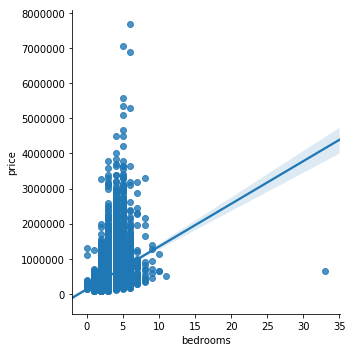

In [8]:
# sns.lmplot(x='bedrooms', y='price', data=df_new)
sns.lmplot(x='bedrooms', y='price', data=df_new)

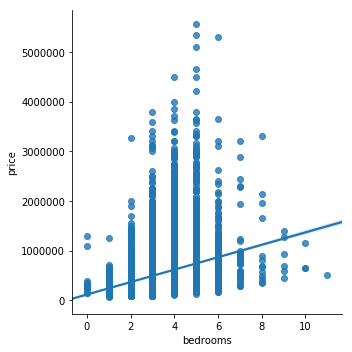

In [9]:
# let's get rid of outliers - too may bedrooms and too high prices
# limit the data to bedrooms <15, price <6000000
df1_new = df_new.loc[(df_new['price']<6000000) & (df_new['bedrooms'] <15)]

# Let's plot it again
sns.lmplot(x='bedrooms', y='price', data=df1_new)

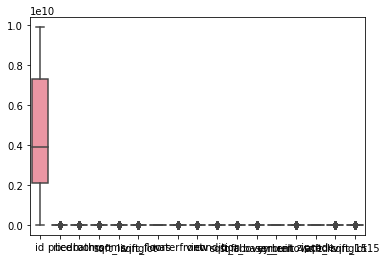

In [10]:
# let's do a boxplot of a new dataframe, df1_new
sns.boxplot(data=df1_new)

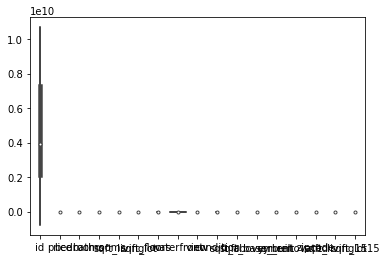

In [11]:
# let's do a violin plot
sns.violinplot(data=df1_new)

In [13]:
# let's drop columns 'date', 'waterfront', and 'view';
# create a dataframe containing stats, stats_df
stats_df = df1_new.drop(['date','waterfront','view'], axis=1)
stats_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,1180,0,1955,0,98178,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,2170,400,1951,1991,98125,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,770,0,1933,0,98028,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,1050,910,1965,0,98136,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,1680,0,1987,0,98074,1800,7503


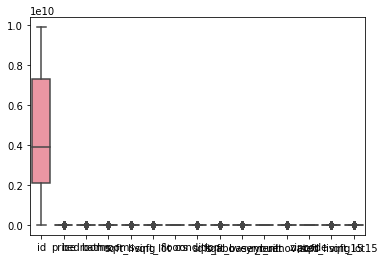

In [14]:
# let's do a boxplot for stats
sns.boxplot(data=stats_df)


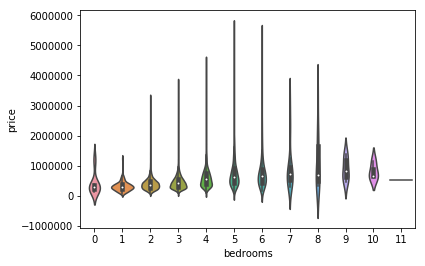

In [15]:
# violin plot 
sns.violinplot(x='bedrooms', y='price',data=stats_df)

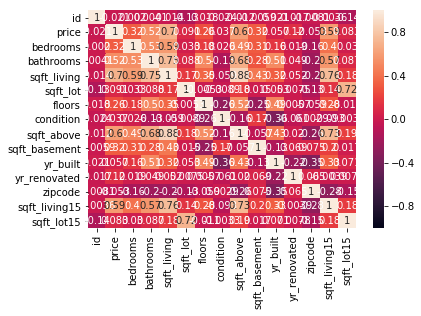

In [16]:
# let's do correlation of stats via heatmap
corr = stats_df.corr()
sns.heatmap(corr, vmin=-1,annot=True)

In [18]:
# let's do some regression analysis on this data
# import library to build a statistical test for linear regression
import statsmodels.formula.api as smf

In [19]:
# Let's use Ordinary Linear Squares (OLS), to calculate the best linear regression line
result = smf.ols('price ~ bedrooms + sqft_living + zipcode', data=stats_df).fit()

In [20]:
# Let's plot the results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     7486.
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:10:16   Log-Likelihood:            -2.9934e+05
No. Observations:               21609   AIC:                         5.987e+05
Df Residuals:                   21605   BIC:                         5.987e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.544e+07    3.2e+06    -17.320      0.000   -6.17e+07   -4.92e+07
bedrooms    -5.714e+04   2338.403    -24.437      0.000   -6.17e+04   -5.26e+04
sqft_living   314.7915      2.344    134.325      0.000     310.198     319.385
zipcode       566.0537     32.626     17.350      0.000     502.104     630.003
==============================================================================
Omnibus:                    12484.239   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           245311.248
Skew:                           2.387   Prob(JB):                         0.00
Kurtosis:                      18.801   Cond. No.                     1.84e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Let's take out the intercept and see again
result = smf.ols('price ~ bedrooms + sqft_living + zipcode -1', data=stats_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 4.003e+04
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:12:13   Log-Likelihood:            -2.9949e+05
No. Observations:               21609   AIC:                         5.990e+05
Df Residuals:                   21606   BIC:                         5.990e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -5.918e+04   2351.532    -25.169      0.000   -6.38e+04   -5.46e+04
sqft_living   309.3283      2.338    132.294      0.000     304.745     313.911
zipcode         0.9744      0.067     14.451      0.000       0.842       1.107
==============================================================================
Omnibus:                    12388.711   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           236470.898
Skew:                           2.372   Prob(JB):                         0.00
Kurtosis:                      18.496   Cond. No.                     1.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#creates a table of correlation values of stats_df
stats_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,1.000000,-0.020704,0.001994,0.004082,-0.014108,-0.132225,0.018285,-0.023637,-0.012453,-0.005910,0.021444,-0.017487,-0.008055,-0.003554,-0.138951
price,-0.020704,1.000000,0.316551,0.523482,0.698797,0.090751,0.259689,0.037410,0.602142,0.320141,0.057291,0.121357,-0.053137,0.591702,0.083265
bedrooms,0.001994,0.316551,1.000000,0.528629,0.592069,0.032685,0.180737,0.025506,0.490158,0.308601,0.159495,0.018641,-0.157023,0.401974,0.030251
bathrooms,0.004082,0.523482,0.528629,1.000000,0.753450,0.087667,0.501007,-0.125322,0.683469,0.281295,0.508058,0.048635,-0.204160,0.567946,0.087031
sqft_living,-0.014108,0.698797,0.592069,0.753450,1.000000,0.173370,0.354482,-0.059026,0.875506,0.432338,0.321126,0.051519,-0.200050,0.757571,0.183873
sqft_lot,-0.132225,0.090751,0.032685,0.087667,0.173370,1.000000,-0.005277,-0.008921,0.183876,0.015073,0.053118,0.007469,-0.129539,0.144526,0.718559
floors,0.018285,0.259689,0.180737,0.501007,0.354482,-0.005277,1.000000,-0.263771,0.524865,-0.247048,0.489615,0.005730,-0.059060,0.279554,-0.011339
condition,-0.023637,0.037410,0.025506,-0.125322,-0.059026,-0.008921,-0.263771,1.000000,-0.158732,0.174254,-0.361361,-0.060735,0.002893,-0.092727,-0.003321
sqft_above,-0.012453,0.602142,0.490158,0.683469,0.875506,0.183876,0.524865,-0.158732,1.000000,-0.057200,0.426559,0.020103,-0.261778,0.732117,0.194376
sqft_basement,-0.005910,0.320141,0.308601,0.281295,0.432338,0.015073,-0.247048,0.174254,-0.057200,1.000000,-0.132516,0.068929,0.075175,0.199030,0.017180


In [23]:
# Let's add other correlated variables, such as bathrooms, sqft_above, and take out zipcode; plot it again
result = smf.ols('price ~ bathrooms + sqft_living + sqft_above -1', data=stats_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 3.867e+04
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:19:54   Log-Likelihood:            -2.9981e+05
No. Observations:               21609   AIC:                         5.996e+05
Df Residuals:                   21606   BIC:                         5.996e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bathrooms   -1.182e+04   2948.071     -4.009      0.000   -1.76e+04   -6041.458
sqft_living   289.8159      4.406     65.781      0.000     281.180     298.452
sqft_above    -19.6878      4.379     -4.496      0.000     -28.271     -11.105
==============================================================================
Omnibus:                    13168.077   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           278709.564
Skew:                           2.549   Prob(JB):                         0.00
Kurtosis:                      19.839   Cond. No.                     5.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Let's add other correlated variables, such as bathrooms, sqft_above, and with zipcode; plot it again
result = smf.ols('price ~ bathrooms + sqft_living + zipcode + sqft_above -1', data=stats_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 2.904e+04
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:21:08   Log-Likelihood:            -2.9979e+05
No. Observations:               21609   AIC:                         5.996e+05
Df Residuals:                   21605   BIC:                         5.996e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bathrooms   -2269.1504   3464.007     -0.655      0.512   -9058.860    4520.559
sqft_living   289.9852      4.403     65.858      0.000     281.355     298.616
zipcode        -0.2754      0.053     -5.243      0.000      -0.378      -0.172
sqft_above    -17.7988      4.391     -4.053      0.000     -26.406      -9.192
==============================================================================
Omnibus:                    12701.238   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           253982.976
Skew:                           2.440   Prob(JB):                         0.00
Kurtosis:                      19.071   Cond. No.                     1.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""